## **Getting Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib notebook
sns.set(style="darkgrid")

# setting the random seed to get consistent results.
np.random.seed(7)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Training samples =", train.shape[0])
print("Testing samples =", test.shape[0])

train.head()

Training samples = 891
Testing samples = 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking for null values

Now we check for the null values in both the training and test data.  So, we concatenate the training and testing samples. <br> 
We see attributes like *Age, Cabin, Fare and Embarked* have null values.

In [3]:
train_rows = train.shape[0]
y_train = train.pop('Survived')
test_id = test['PassengerId']

# merging the train and test set to apply preprocessing.
data = pd.concat([train, test])
del train
del test
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Preprocessing and Visualization

* Dropping unnecessary columns like *PassengerId,* and *Ticket*
* Filling up the null values as follows :
    - in Age by median value.
    - in Fare by mean value.
    - in Embarked with most frequent value.
* SibSp and Parch are combined to With_Family - 0 or 1
* Normalizing the fare and the age.
* Get dummies for the categorical attributes, * Sex, Embarked and Pclass*



In [4]:
from sklearn.preprocessing import Imputer

data.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

# filling the missing values in Age column with the median value
imputer = Imputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# filling the missing values in Fare column with the mean value
imputer = Imputer(strategy='mean')
data['Fare'] = imputer.fit_transform(data[['Fare']])

# filling the missing values in Embarked column with most frequent value, i.e. 'S'
data.Embarked.fillna('S', inplace=True)

# Again checking for the null values.
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<IPython.core.display.Javascript object>


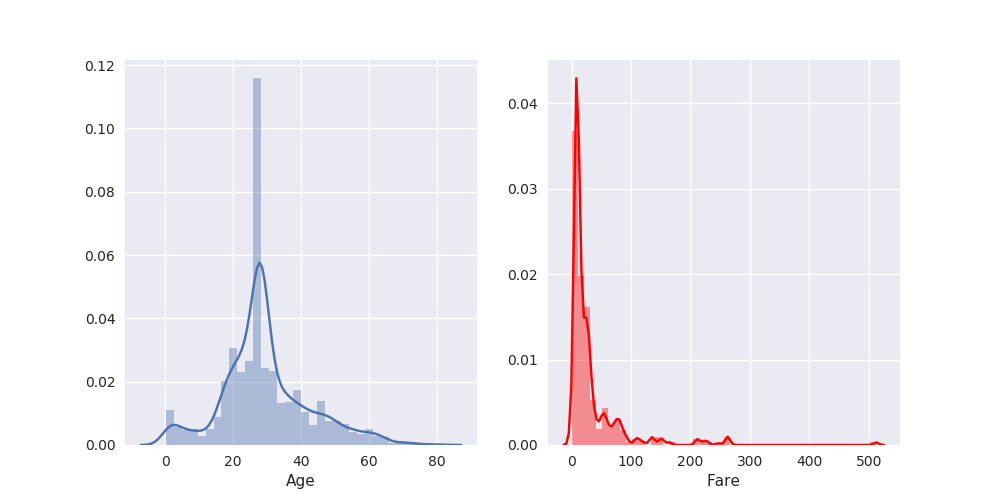

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(data.Age, ax=ax[0])
sns.distplot(data.Fare, ax=ax[1], color='red')

### We see that most of the passengers are in the age group of 20-40.  Similarly, the fare seems to be around 0-100 for most passengers.

In [6]:
#  Normalizing the Fare and Age values

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
data['Fare'] = np.log1p(data.Fare)
data['Age'] = mm.fit_transform(data[['Age']])

In [7]:
data['With_Family'] = data.SibSp + data.Parch
data.With_Family = data.With_Family.apply(lambda x: 1 if x > 0 else 0)
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [8]:
train = pd.concat([data[:train_rows], y_train], axis=1)

In [9]:
def annotate(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('%d' %(y), (x.mean(), y), ha='center', va='bottom')
        
def plot_with_count(attribute):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    sns.countplot(x=attribute, data=train, ax=ax[0])
    annotate(ax[0])
    sns.countplot(x=attribute, data=train, ax=ax[1], hue='Sex')
    annotate(ax[1])
    sns.countplot(x=attribute, data=train, ax=ax[2], hue='Survived')
    annotate(ax[2])
    plt.tight_layout()

<IPython.core.display.Javascript object>


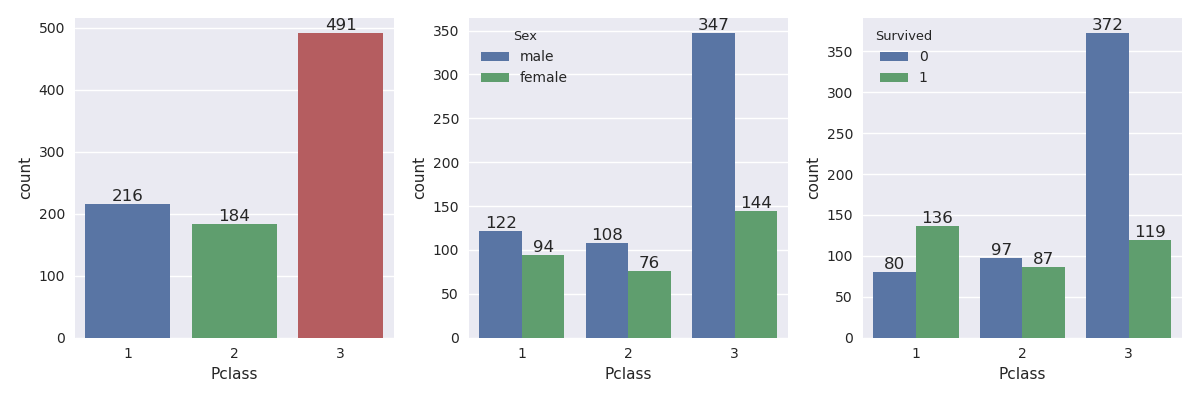

In [10]:
plot_with_count(attribute='Pclass')

<IPython.core.display.Javascript object>


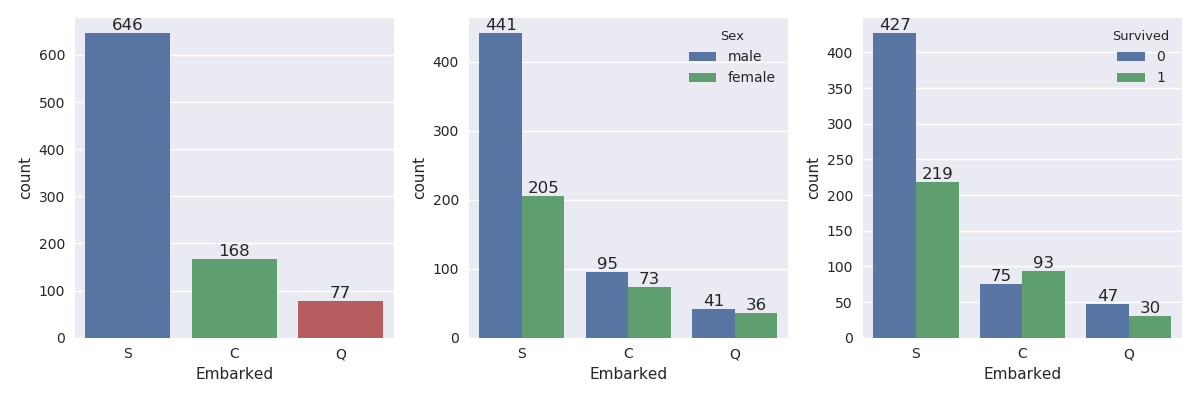

In [11]:
plot_with_count(attribute='Embarked')

<IPython.core.display.Javascript object>


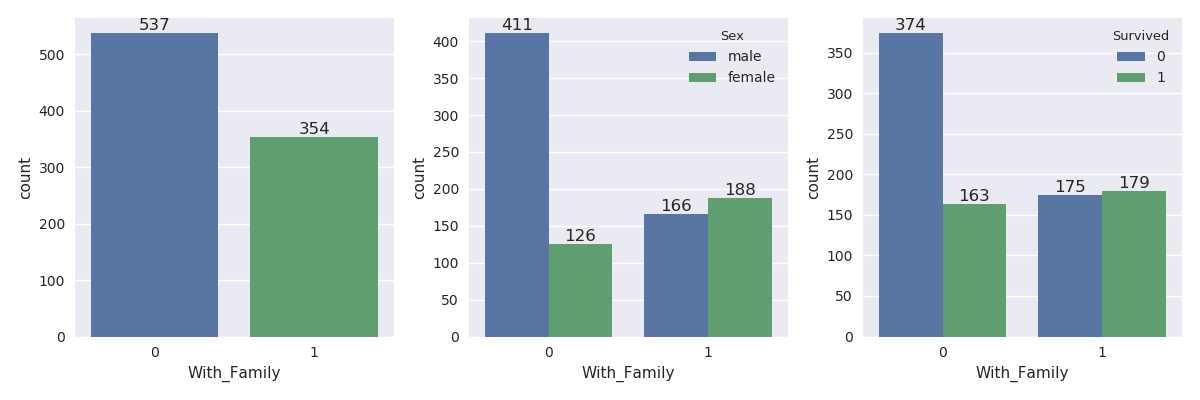

In [12]:
plot_with_count(attribute='With_Family')

In [13]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,With_Family
0,3,male,0.273456,2.110213,S,1
1,1,female,0.473882,4.280593,C,1
2,3,female,0.323563,2.188856,S,0
3,1,female,0.436302,3.990834,S,1
4,3,male,0.436302,2.202765,S,0


In [14]:
data = pd.get_dummies(data=data, columns=['Pclass', 'Sex', 'Embarked'])
data.head()

,Age,Fare,With_Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.273456,2.110213,1,0,0,1,0,1,0,0,1
1,0.473882,4.280593,1,1,0,0,1,0,1,0,0
2,0.323563,2.188856,0,0,0,1,1,0,0,0,1
3,0.436302,3.990834,1,1,0,0,1,0,0,0,1
4,0.436302,2.202765,0,0,0,1,0,1,0,0,1


In [15]:
train = data[:train_rows]
test = data[train_rows:]

del data

# Predicting the passenger survival

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

clf = XGBClassifier()
scores = cross_val_score(clf, train, y_train, cv=10)
np.mean(scores)

0.81602570650323458

In [17]:
clf.fit(train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
'''import operator

feature_imp = {}
for feature, imp in zip(train.columns, clf.feature_importances_):
    feature_imp[feature] = imp
    
feature_imp = sorted(feature_imp.items(), key=operator.itemgetter(1), reverse=True)'''

'import operator\n\nfeature_imp = {}\nfor feature, imp in zip(train.columns, clf.feature_importances_):\n    feature_imp[feature] = imp\n    \nfeature_imp = sorted(feature_imp.items(), key=operator.itemgetter(1), reverse=True)'

In [19]:
#feature_imp

## Predicting the results on test data

In [20]:
y_pred = clf.predict(test)
y_pred = pd.Series(y_pred)
test_df = pd.DataFrame([test_id, y_pred]).transpose()
test_df.columns = ['PassengerId', 'Survived']
test_df.to_csv('submission.csv', index=False)